# Simple and Multiple Linear Regression

### Importing required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from LinearRegression import LinearRegression

### Importing dataset

In [2]:
data = pd.read_csv('archive/House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Analysing dataset and normalizing data

In [3]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [4]:
def normalization(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mu) / std

In [5]:
X, y = data['Size'].values, data['Rent'].values
X = X.reshape(-1, 1)
X = normalization(X)
print(f"X values are: {X} \n and y values are: {y}")

X values are: [[ 0.2089605 ]
 [-0.26412451]
 [ 0.0512655 ]
 ...
 [ 1.233978  ]
 [ 0.8397405 ]
 [ 0.0512655 ]] 
 and y values are: [10000 20000 17000 ... 35000 45000 15000]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
print(f"Shape of X: {X.shape} \n and Shape of y: {y.shape}\n")
print(f"Shape of X_train: {X_train.shape}, \n Shape of X_test: {X_test.shape}, \n Shape of y_train: {y_train.shape}, \n Shape of y_test: {y_test.shape}")

Shape of X: (4746, 1) 
 and Shape of y: (4746,)

Shape of X_train: (3796, 1), 
 Shape of X_test: (950, 1), 
 Shape of y_train: (3796,), 
 Shape of y_test: (950,)


### ploting Data

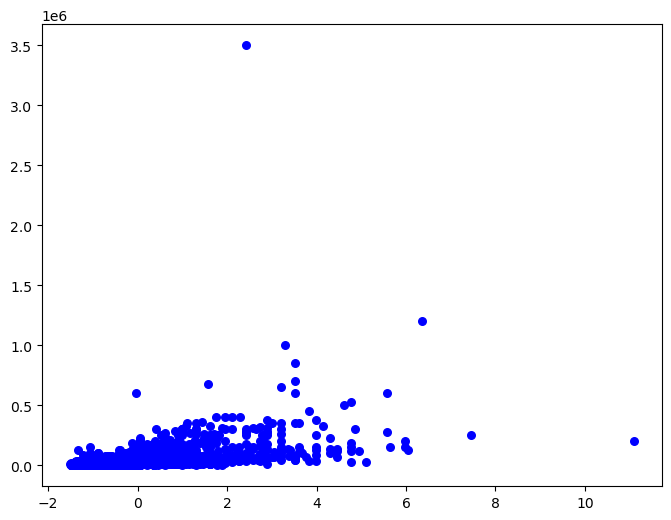

In [8]:
# plt.scatter(X_train, Y_train)
# plt.show()

fig = plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color = "b", marker = "o", s = 30)
plt.show()

### Calling LinearRegression class for simple Linear Regression

Calling the linear regression class that we created as a .py file

In [9]:
# reg = LinearRegression()
# reg.fit(X_train, Y_train)
#1851018880.9089696
#1852893725.657477
# predictions = reg.predict(X_test)

reg = LinearRegression(lr = 0.005, n_iter=1000)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

w value is: [34219.17301461], b value is: 35406.556360934184


### Calculating Mean Square Error

In [10]:
def mse(y_test, predictions):
    return np.mean((y_test - predictions)**2)

In [11]:
mse = mse(y_test, predictions)
mse

2076866650.4840496

### Plotting Simple Linear regression results

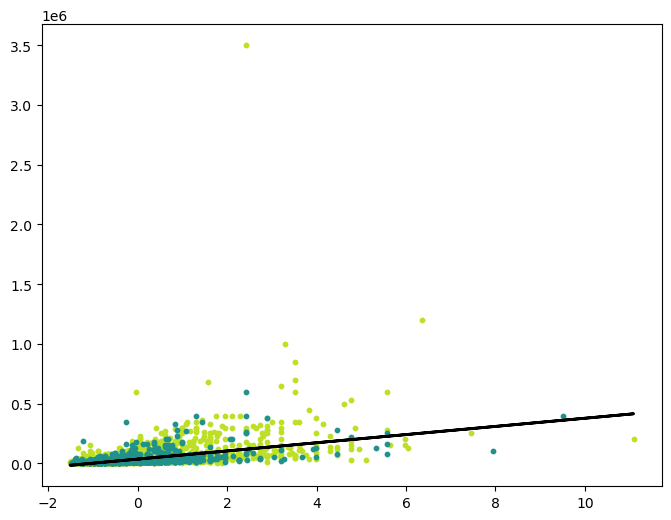

In [12]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

### Multiple Linear Regression

Analysing and Normalizing data for Multiple Linear Regression

In [13]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [14]:
coloumn_names = ['Size', 'BHK', 'Bathroom']
MX = data[coloumn_names]
MX = MX.values
MX

array([[1100,    2,    2],
       [ 800,    2,    1],
       [1000,    2,    1],
       ...,
       [1750,    3,    3],
       [1500,    3,    2],
       [1000,    2,    2]])

In [15]:
MX = normalization(MX)
MX

array([[ 0.2089605 , -0.10077301,  0.03859399],
       [-0.26412451, -0.10077301, -1.09206691],
       [ 0.0512655 , -0.10077301, -1.09206691],
       ...,
       [ 1.233978  ,  1.10090711,  1.16925489],
       [ 0.8397405 ,  1.10090711,  0.03859399],
       [ 0.0512655 , -0.10077301,  0.03859399]])

In [16]:
MX_train, MX_test, my_train, my_test = train_test_split(MX, y, test_size=0.2)
print(f"Shape of X: {MX.shape} \n and Shape of y: {y.shape}\n")
print(f"Shape of X_train: {MX_train.shape}, \n Shape of X_test: {MX_test.shape}, \n Shape of y_train: {my_train.shape}, \n Shape of y_test: {my_test.shape}")

Shape of X: (4746, 3) 
 and Shape of y: (4746,)

Shape of X_train: (3796, 3), 
 Shape of X_test: (950, 3), 
 Shape of y_train: (3796,), 
 Shape of y_test: (950,)


### Calling Linear Regression for Multiple Linear Regression

In [17]:
multi = LinearRegression(lr = 0.095, n_iter=1000)
multi.fit(MX_train, my_train)
mpredictions = multi.predict(MX_test)

w value is: [16678.63284301 -1422.97860409 24132.36436499], b value is: 35474.039167589945


### Calculating Mean Square Error

In [18]:
np.mean((my_test - mpredictions) ** 2)

2218598507.7385345

### Plotting Multiple Linear Regression Results

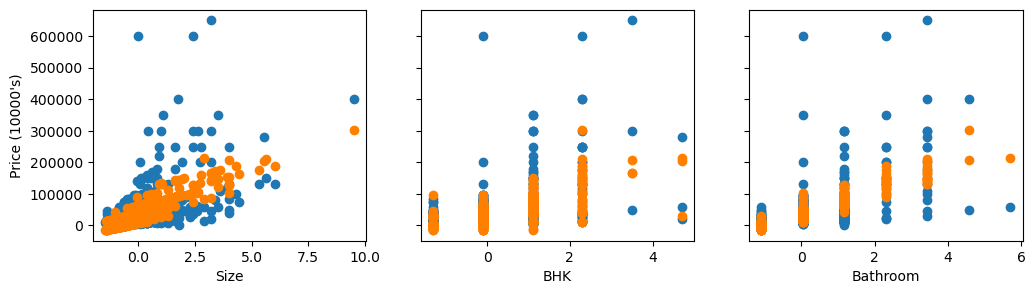

In [19]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(MX_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(coloumn_names[i])
    ax[i].scatter(MX_test[:,i],mpredictions,color=(1.0, 0.5, 0.0), label = 'predict')
ax[0].set_ylabel("Price (10000's)")
plt.show()